# Qutrits

Author: Mainak Bhattacharyya

<br>

Qubits: Two state system.

Qutrits: Tri state system.

Basically by qutrits, we mean that any individual system can be in three states: $\ket{0}, \ket{1}, \ket{2}$. Now let us see how the Bernstein-Vazzirani problem can be solved if considered qutrit system.

The oracle function is $$f(x) = x.s \,\,mod(3)$$,

where $x,s \in \{0,1\}^n$ and $x_i, s_i \in \{0,1,2\}$.

### Gates for qutrits:

1. TShift:

   This is equivalent to Pauli- X gate for qutrits.

\begin{align}
TShift \ket{0} &= \ket{1},\\
TShift \ket{1} &= \ket{2},\\
TShift \ket{2} &= \ket{0}.
\end{align}

2. TAdd gate:

   This is equivalent to CNOT gate for qutrits.

   e.g. for two qutrits the gate acts as:

\begin{align}
TAdd \ket{i} \ket{j} = \ket{i}\ket{i+j\,\, (mod 3)}
\end{align}

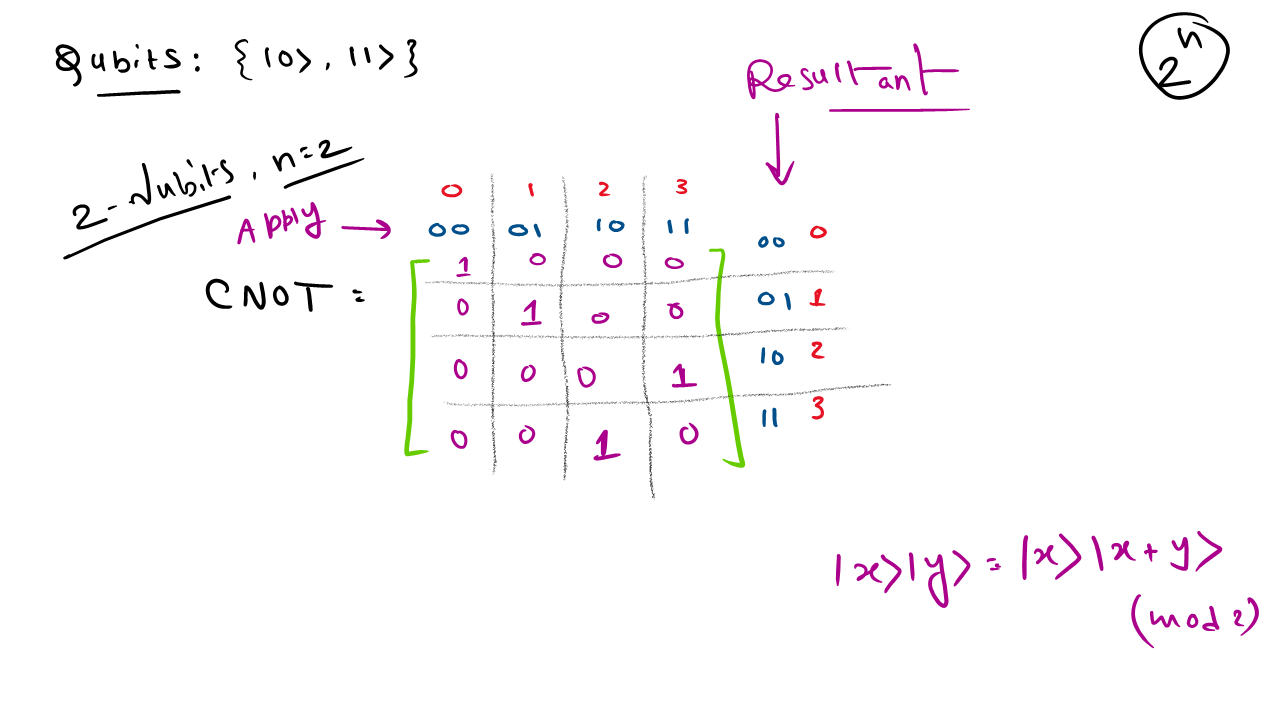

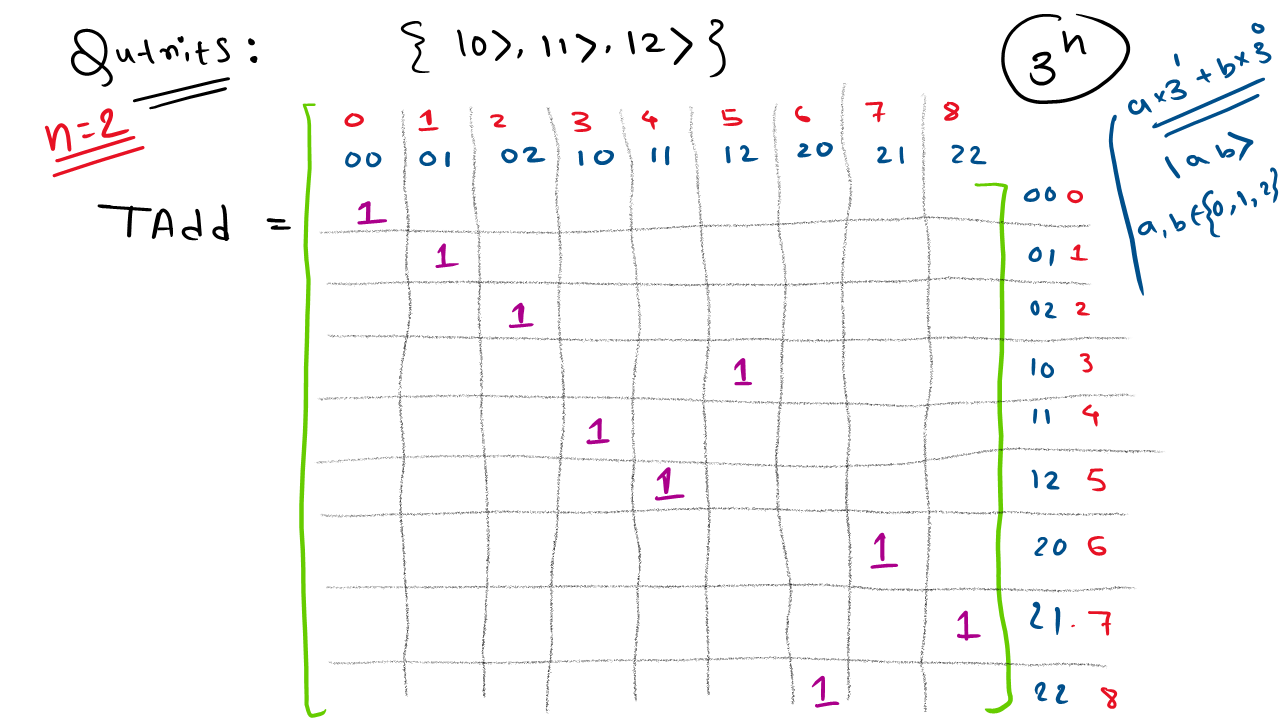

3. THadamard gate
    Hadamard gate for qutrits.

\begin{align}
THadamard = \frac{-i}{\sqrt{3}}\begin{pmatrix}
1 & 1 & 1\\
1 & \omega & \omega^2\\
1 & \omega^2 & \omega
\end{pmatrix}
\end{align}

\begin{align}
\ket{0} &\to \ket{+}:= \frac{-i}{\sqrt{3}} (\ket{0} + \ket{1} + \ket{2}),\\
\ket{1} &\to \ket{\omega}:= \frac{-i}{\sqrt{3}} (\ket{0} + \omega \ket{1} + \omega^2 \ket{2}),\\
\ket{2} &\to \ket{\omega^2}:= \frac{-i}{\sqrt{3}} (\ket{0} + \omega^2 \ket{1} + \omega \ket{2}).
\end{align}

In [1]:
import pennylane as qml

2 Qutrit system

In [2]:
# Secret string
s = "101101"

# Define a QUTRIT device:
dev = qml.device("default.qutrit", wires=len(s)+1, shots = 1)

@qml.qnode(dev)
# The complete protocol
def bv_qt(string: str):
    # Your code goes here ->

    # Ancilla setup
    qml.TShift(wires=len(string))
    qml.THadamard(wires=len(string))

    qml.Barrier()

    # Create an equal superposition of 2^n states.
    for i in range(len(string)):
        qml.THadamard(wires = i)

    qml.Barrier()

    # Apply the Bernstein Vazzirani oracle:
    for i in range(len(string)):
        if int(string[i]) == 1:
            qml.TAdd(wires=[i, len(string)])
    
    qml.Barrier()

    # Create the final Hadamard transform
    for i in range(len(string)):
        qml.THadamard(i)
    # returns Measured final state.
    return qml.sample(wires = range(len(string)))

In [3]:
bv_qt(string=s)

tensor([1., 0., 1., 1., 0., 1.], requires_grad=True)

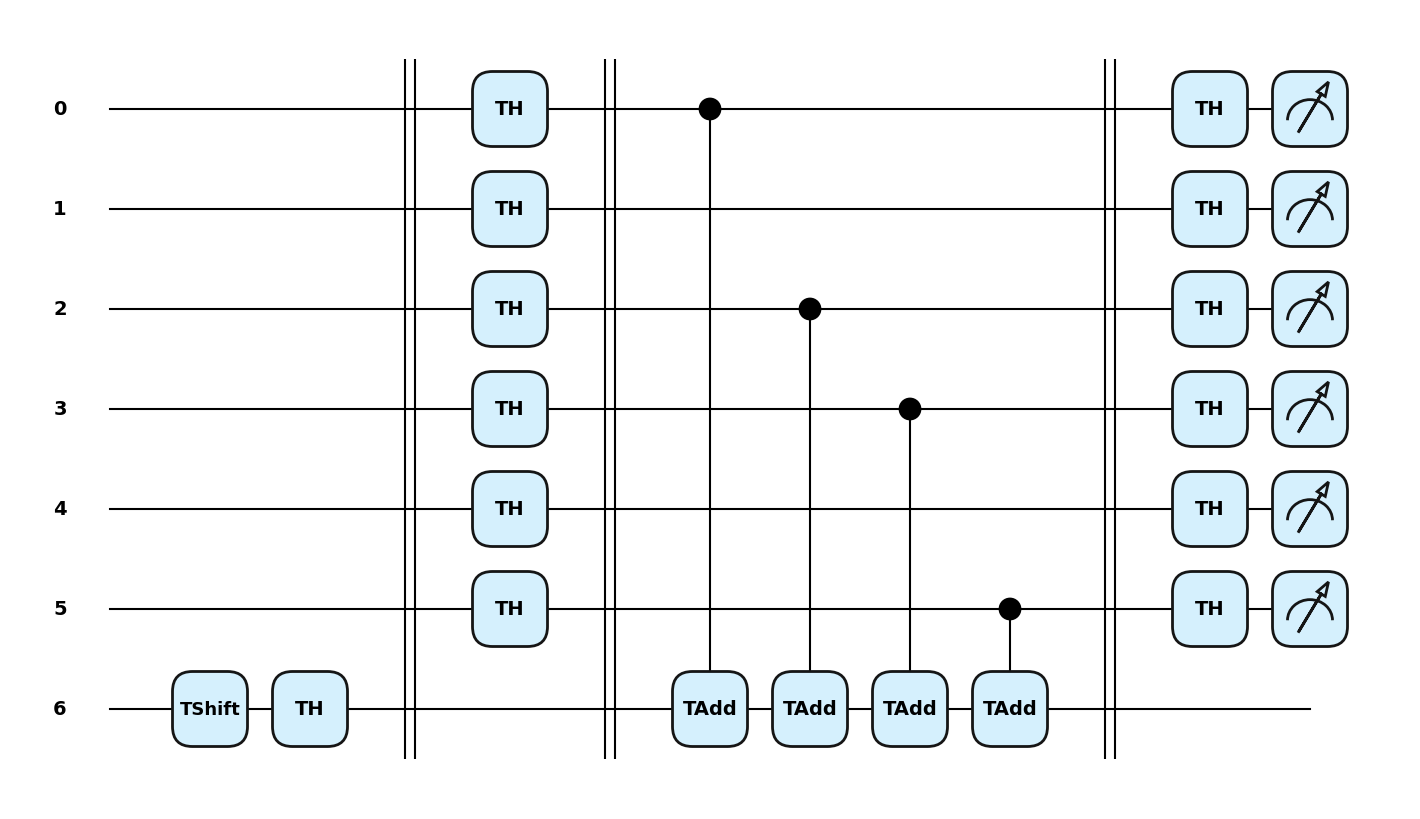

In [4]:
# Visualize the teleportation circuit
_ = qml.draw_mpl(bv_qt, style="pennylane")(s)